In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Input and view Data

Instructions:
To download data, follow the instructions in file ```get_mta.md```. In the working directory, run command
```
python get_mta.py "(2106|2107|2108)"
```
```get_mta.py```will automatically scrape the designated turnstile data from New York MTA website and save the data in a database file named ```mta_data_.db```. In this analysis, we will be using data from 2021 June to 2021 August, three months data included. 

   Next, we use ```sqlalchemy``` to importing data from database to python and save it as dataframe.

In [2]:
from sqlalchemy import create_engine
from sqlalchemy import inspect

In [3]:
engine = create_engine("sqlite:///mta_data.db")
insp = inspect(engine)

In [4]:
#engine.table_names()
insp.get_table_names()

['mta_data']

In [5]:
df = pd.read_sql("SELECT * FROM mta_data;", engine)

In [6]:
del create_engine
del inspect

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802


In [9]:
df.dtypes.to_frame()

,0
C/A,object
UNIT,object
SCP,object
STATION,object
LINENAME,object
DIVISION,object
DATE,object
TIME,object
DESC,object
ENTRIES,int64


In [10]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802


In [11]:
df.shape

(2722610, 11)

In [12]:
df.describe(include='all')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
count,2722610,2722610,2722610,2722610,2722610,2722610,2722610,2722610,2722610,2.722610e+06,2.722610e+06
unique,750,469,228,379,114,6,91,53976,2,NaN,NaN
top,PTH22,R549,00-00-00,34 ST-PENN STA,1,IRT,07/02/2021,00:00:00,REGULAR,NaN,NaN
freq,23352,37171,252773,55373,330113,978256,30378,233191,2710456,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.168248e+07,3.329946e+07
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.185146e+08,1.919706e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.179232e+05,9.944325e+04
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.405620e+06,8.552440e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.023157e+06,3.968192e+06


# Clean Data 

In [13]:
# TO check column name format
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In python and pandas we can convert date and time information to datetime objects, which allow us to do time-based operations Using either pd.to_datetime . In pandas or the python datetime library,combine the Date and Time columns into a single new column of the datetime datatype

In [14]:
df['DATE_TIME'] = pd.to_datetime(df['DATE']+' '+df['TIME'])
df['DATE'] = pd.to_datetime(df['DATE'])

In [15]:
df['Weekday'] = df['DATE'].dt.day_of_week
df['DayName'] = df['DATE'].dt.day_name()

In [16]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Weekday,DayName
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-08-21,00:00:00,REGULAR,7622548,2607689,2021-08-21 00:00:00,5,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-08-21,04:00:00,REGULAR,7622561,2607697,2021-08-21 04:00:00,5,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-08-21,08:00:00,REGULAR,7622573,2607718,2021-08-21 08:00:00,5,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-08-21,12:00:00,REGULAR,7622604,2607766,2021-08-21 12:00:00,5,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-08-21,16:00:00,REGULAR,7622715,2607802,2021-08-21 16:00:00,5,Saturday


In [17]:
# to drop duplicate recorde for same turnstile at the same time.
(df.drop_duplicates(subset = 
                    ['C/A','UNIT', 'SCP','STATION','DATE','TIME'],
                    inplace = True))


In [18]:
# we can find out that some duplicate data is dropped
df.shape

(2722581, 14)

To find out record number for each turnstiles during each time slot. And we can see that only one record for 



In [19]:
(df.groupby(['C/A','UNIT', 'SCP','STATION','DATE_TIME'], 
    as_index = False)['EXITS']
    .count()
    .sort_values('EXITS',ascending = False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,2021-05-29 00:00:00,1
1815048,R138,R293,00-03-02,34 ST-PENN STA,2021-07-22 18:00:00,1
1815050,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 02:00:00,1
1815051,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 06:00:00,1
1815052,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 10:00:00,1


There are a few columns wont have impact to our analysis, to make our dataset simple and terse, we only take what we will be using in the later data calculations.

In [20]:
turnstile_df = df[["C/A", "UNIT", "SCP", "STATION","DATE","DATE_TIME","ENTRIES","EXITS","Weekday","DayName"]]
turnstile_df.dtypes

C/A                  object
UNIT                 object
SCP                  object
STATION              object
DATE         datetime64[ns]
DATE_TIME    datetime64[ns]
ENTRIES               int64
EXITS                 int64
Weekday               int64
DayName              object
dtype: object

# Data Analysis

##  1. Calculate daily entries and exits number for each turnstile on each day

In [21]:
# set up columns of pre entires and pre exists 
turnstile_df[['PRE_TIME','PRE_ENTRIES','PRE_EXITS']]=(
                                                turnstile_df[['DATE_TIME','ENTRIES','EXITS']]
                                             .apply(lambda x:x.shift(1)))

turnstile_df.head()

/Users/kristy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,ENTRIES,EXITS,Weekday,DayName,PRE_TIME,PRE_ENTRIES,PRE_EXITS
0,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 00:00:00,7622548,2607689,5,Saturday,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 04:00:00,7622561,2607697,5,Saturday,2021-08-21 00:00:00,7622548.0,2607689.0
2,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 08:00:00,7622573,2607718,5,Saturday,2021-08-21 04:00:00,7622561.0,2607697.0
3,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 12:00:00,7622604,2607766,5,Saturday,2021-08-21 08:00:00,7622573.0,2607718.0
4,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 16:00:00,7622715,2607802,5,Saturday,2021-08-21 12:00:00,7622604.0,2607766.0


In [22]:
# Drop the data with null value of PRE_ENTRIES
turnstile_df = turnstile_df.dropna(subset =['PRE_ENTRIES','PRE_EXITS'])
turnstile_df.head()


,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,ENTRIES,EXITS,Weekday,DayName,PRE_TIME,PRE_ENTRIES,PRE_EXITS
1,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 04:00:00,7622561,2607697,5,Saturday,2021-08-21 00:00:00,7622548.0,2607689.0
2,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 08:00:00,7622573,2607718,5,Saturday,2021-08-21 04:00:00,7622561.0,2607697.0
3,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 12:00:00,7622604,2607766,5,Saturday,2021-08-21 08:00:00,7622573.0,2607718.0
4,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 16:00:00,7622715,2607802,5,Saturday,2021-08-21 12:00:00,7622604.0,2607766.0
5,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 20:00:00,7622861,2607817,5,Saturday,2021-08-21 16:00:00,7622715.0,2607802.0


In [23]:
turnstile_df['TIMESLOT_ENTRIES'] = turnstile_df.ENTRIES - turnstile_df.PRE_ENTRIES
turnstile_df['TIMESLOT_EXITS'] = turnstile_df.EXITS - turnstile_df.PRE_EXITS
turnstile_df.head()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,ENTRIES,EXITS,Weekday,DayName,PRE_TIME,PRE_ENTRIES,PRE_EXITS,TIMESLOT_ENTRIES,TIMESLOT_EXITS
1,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 04:00:00,7622561,2607697,5,Saturday,2021-08-21 00:00:00,7622548.0,2607689.0,13.0,8.0
2,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 08:00:00,7622573,2607718,5,Saturday,2021-08-21 04:00:00,7622561.0,2607697.0,12.0,21.0
3,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 12:00:00,7622604,2607766,5,Saturday,2021-08-21 08:00:00,7622573.0,2607718.0,31.0,48.0
4,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 16:00:00,7622715,2607802,5,Saturday,2021-08-21 12:00:00,7622604.0,2607766.0,111.0,36.0
5,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 20:00:00,7622861,2607817,5,Saturday,2021-08-21 16:00:00,7622715.0,2607802.0,146.0,15.0


Check values of `'TIMESLOT_ENTRIES'`, it shows the values are extremely diverisfied, 
both large positive number and negative number shows.

In [24]:
turnstile_df.describe()

,ENTRIES,EXITS,Weekday,PRE_ENTRIES,PRE_EXITS,TIMESLOT_ENTRIES,TIMESLOT_EXITS
count,2.722580e+06,2.722580e+06,2.722580e+06,2.722580e+06,2.722580e+06,2.722580e+06,2.722580e+06
mean,4.168277e+07,3.329976e+07,2.999166e+00,4.168277e+07,3.329977e+07,-2.797712e+00,-9.575888e-01
std,2.185157e+08,1.919716e+08,1.999484e+00,2.185157e+08,1.919716e+08,4.658947e+07,4.118800e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.144328e+09,-2.108676e+09
25%,2.179170e+05,9.944100e+04,1.000000e+00,2.179192e+05,9.944175e+04,3.000000e+00,5.000000e+00
50%,1.405580e+06,8.552185e+05,3.000000e+00,1.405582e+06,8.552215e+05,2.600000e+01,2.900000e+01
75%,6.023165e+06,3.968201e+06,5.000000e+00,6.023178e+06,3.968201e+06,8.500000e+01,9.000000e+01
max,2.147417e+09,2.122890e+09,6.000000e+00,2.147417e+09,2.122890e+09,2.147017e+09,2.122496e+09


(array([  5., 992.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([-1.54938390e+07, -1.08616622e+06,  1.33215066e+07,  2.77291793e+07,
         4.21368521e+07,  5.65445249e+07,  7.09521977e+07,  8.53598705e+07,
         9.97675432e+07,  1.14175216e+08,  1.28582889e+08,  1.42990562e+08,
         1.57398234e+08,  1.71805907e+08,  1.86213580e+08,  2.00621253e+08,
         2.15028925e+08,  2.29436598e+08,  2.43844271e+08,  2.58251944e+08,
         2.72659617e+08,  2.87067289e+08,  3.01474962e+08,  3.15882635e+08,
         3.30290308e+08,  3.44697980e+08,  3.59105653e+08,  3.73513326e+08,
         3.87920999e+08,  4.02328672e+08,  4.16736344e+08,  4.31144017e+08,
         4.45551690e+08,  4.59959363e+08,  4.74367

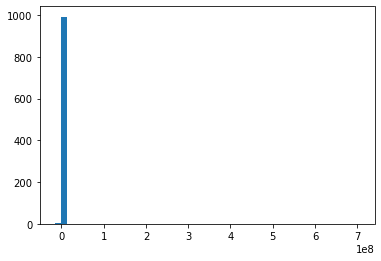

In [25]:
plt.hist(turnstile_df.TIMESLOT_ENTRIES.sample(1000), bins =50)        

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,   1.,   4., 981.,
          1.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([-35100943.  , -34031668.48, -32962393.96, -31893119.44,
        -30823844.92, -29754570.4 , -28685295.88, -27616021.36,
        -26546746.84, -25477472.32, -24408197.8 , -23338923.28,
        -22269648.76, -21200374.24, -20131099.72, -19061825.2 ,
        -17992550.68, -16923276.16, -15854001.64, -14784727.12,
        -13715452.6 , -12646178.08, -11576903.56, -10507629.04,
         -9438354.52,  -8369080.  ,  -7299805.48,  -6230530.96,
         -5161256.44,  -4091981.92,  -3022707.4 ,  -1953432.88,
          -884158.36,    185116.16,   1254390.68,   2323665.2 ,
          3392939.72,   4462214.24,   5531488.76,   6600763.28,
          7670037.

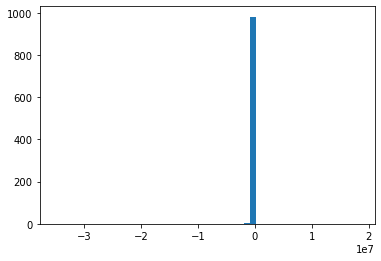

In [26]:
plt.hist(turnstile_df.TIMESLOT_EXITS.sample(1000), bins =50) 

We can see that the distribution of both ```TIMESLOT_ENTRIES``` and ```TIMESLOT_EXITS``` are extremely diversified. Since we are focusing on the long-term and lasting flow rate of Morning and Evening time, it is ok to ignore the occasional abrubt giganic records. According to the 1.5 of IQR rule, we can treat record more than about 150 as outlier. But considering huge difference exists between stations, we use a larger maximum number of 5000

To correct those negative entry/exit and super big records. 

In [27]:
def correct_timeslot_entry_exit(row, max_num):
    traffic = row["EXITS"] - row["PRE_EXITS"]
    if traffic < 0:
        traffic = -traffic
    if traffic > max_num:
        traffic = min(row["EXITS"],row["PRE_EXITS"])
    if traffic > max_num:
        traffic = 0
    return traffic
turnstile_df.TIMESLOT_EXITS = turnstile_df.apply(correct_timeslot_entry_exit,axis=1,max_num = 5000)


In [28]:
def correct_timeslot_entry_exit(row, max_num):
    traffic = row["ENTRIES"] - row["PRE_ENTRIES"]
    if traffic < 0:
        traffic = -traffic
    if traffic > max_num:
        traffic = min(row["ENTRIES"],row["PRE_ENTRIES"])
    if traffic > max_num:
        traffic = 0
    return traffic
turnstile_df.TIMESLOT_ENTRIES = turnstile_df.apply(correct_timeslot_entry_exit,axis=1,max_num = 5000)

(array([627., 190., 100.,  43.,  14.,  14.,   7.,   2.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.  ,   57.84,  115.68,  173.52,  231.36,  289.2 ,  347.04,
         404.88,  462.72,  520.56,  578.4 ,  636.24,  694.08,  751.92,
         809.76,  867.6 ,  925.44,  983.28, 1041.12, 1098.96, 1156.8 ,
        1214.64, 1272.48, 1330.32, 1388.16, 1446.  , 1503.84, 1561.68,
        1619.52, 1677.36, 1735.2 , 1793.04, 1850.88, 1908.72, 1966.56,
        2024.4 , 2082.24, 2140.08, 2197.92, 2255.76, 2313.6 , 2371.44,
        2429.28, 2487.12, 2544.96, 2602.8 , 2660.64, 2718.48, 2776.32,
        2834.16, 2892.  ]),
 <BarContainer object of 50 artists>)

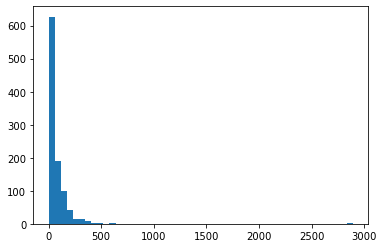

In [29]:
plt.hist(turnstile_df.TIMESLOT_ENTRIES.sample(1000), bins =50) 

(array([523., 143.,  90.,  69.,  37.,  26.,  22.,  24.,  11.,  11.,   8.,
          4.,   9.,   4.,   6.,   2.,   1.,   1.,   1.,   3.,   0.,   0.,
          1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.  ,   29.64,   59.28,   88.92,  118.56,  148.2 ,  177.84,
         207.48,  237.12,  266.76,  296.4 ,  326.04,  355.68,  385.32,
         414.96,  444.6 ,  474.24,  503.88,  533.52,  563.16,  592.8 ,
         622.44,  652.08,  681.72,  711.36,  741.  ,  770.64,  800.28,
         829.92,  859.56,  889.2 ,  918.84,  948.48,  978.12, 1007.76,
        1037.4 , 1067.04, 1096.68, 1126.32, 1155.96, 1185.6 , 1215.24,
        1244.88, 1274.52, 1304.16, 1333.8 , 1363.44, 1393.08, 1422.72,
        1452.36, 1482.  ]),
 <BarContainer object of 50 artists>)

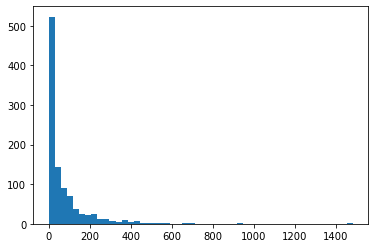

In [30]:
plt.hist(turnstile_df.TIMESLOT_EXITS.sample(1000), bins =50) 

##  2. To calculate total traffic recorded in the mornings and evenings of each Station

### To sign a TIME_SLOT marker for each record time

We assign time marker "TIME_SLOT" for each record time. The main analysis focuse is on time duration of Morning and Evening.  We assign the "TIME_SLOT" marker as "Morning" for the records are beween 06:00am to 11:00am, during which is work commute time; Iwe assign the "TIME_SLOT" marker as "Evening" for the records are beween 16:00pm to 20:00pm, during whihc most peple leave their work  .

In [31]:
bins = [0,6,11,16,20,25]
l = ['Early Morning', 'Morning','Afternoon','Evening','Night']
turnstile_df['TIME_SLOT'] = (pd.cut(turnstile_df['DATE_TIME']
                                     .dt.hour,
                                      bins = bins,
                                      labels = l,
                                     include_lowest=True))
turnstile_df.tail()

,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,ENTRIES,EXITS,Weekday,DayName,PRE_TIME,PRE_ENTRIES,PRE_EXITS,TIMESLOT_ENTRIES,TIMESLOT_EXITS,TIME_SLOT
2722605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-06-04,2021-06-04 05:00:00,5554,577,4,Friday,2021-06-04 01:00:00,5554.0,577.0,0.0,0.0,Early Morning
2722606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-06-04,2021-06-04 09:00:00,5554,577,4,Friday,2021-06-04 05:00:00,5554.0,577.0,0.0,0.0,Morning
2722607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-06-04,2021-06-04 13:00:00,5554,577,4,Friday,2021-06-04 09:00:00,5554.0,577.0,0.0,0.0,Afternoon
2722608,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-06-04,2021-06-04 17:00:00,5554,577,4,Friday,2021-06-04 13:00:00,5554.0,577.0,0.0,0.0,Evening
2722609,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-06-04,2021-06-04 21:00:00,5554,577,4,Friday,2021-06-04 17:00:00,5554.0,577.0,0.0,0.0,Night


###  To calculate total traffic recorded in the mornings and evenings of each Station.

In [32]:
mask = (turnstile_df['TIME_SLOT'] == 'Morning') | (turnstile_df['TIME_SLOT'] == 'Evening' )
M_E_Station = turnstile_df[mask]
M_E_Station.TIME_SLOT = M_E_Station.TIME_SLOT.astype('str')
M_E_Station.TIME_SLOT.unique()

/Users/kristy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['Morning', 'Evening'], dtype=object)

In [33]:
M_E_Station['ENTRIES & EXITS'] = M_E_Station['TIMESLOT_ENTRIES'] + M_E_Station['TIMESLOT_EXITS']

M_E_Station.head()

/var/folders/py/tfswslv1637f5tfr0ngkmsgr0000gn/T/ipykernel_1251/248460332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_E_Station['ENTRIES & EXITS'] = M_E_Station['TIMESLOT_ENTRIES'] + M_E_Station['TIMESLOT_EXITS']


,C/A,UNIT,SCP,STATION,DATE,DATE_TIME,ENTRIES,EXITS,Weekday,DayName,PRE_TIME,PRE_ENTRIES,PRE_EXITS,TIMESLOT_ENTRIES,TIMESLOT_EXITS,TIME_SLOT,ENTRIES & EXITS
2,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 08:00:00,7622573,2607718,5,Saturday,2021-08-21 04:00:00,7622561.0,2607697.0,12.0,21.0,Morning,33.0
5,A002,R051,02-00-00,59 ST,2021-08-21,2021-08-21 20:00:00,7622861,2607817,5,Saturday,2021-08-21 16:00:00,7622715.0,2607802.0,146.0,15.0,Evening,161.0
8,A002,R051,02-00-00,59 ST,2021-08-22,2021-08-22 08:00:00,7622936,2607860,6,Sunday,2021-08-22 04:00:00,7622927.0,2607851.0,9.0,9.0,Morning,18.0
11,A002,R051,02-00-00,59 ST,2021-08-22,2021-08-22 20:00:00,7623110,2607923,6,Sunday,2021-08-22 16:00:00,7623020.0,2607912.0,90.0,11.0,Evening,101.0
14,A002,R051,02-00-00,59 ST,2021-08-23,2021-08-23 08:00:00,7623150,2607975,0,Monday,2021-08-23 04:00:00,7623135.0,2607929.0,15.0,46.0,Morning,61.0


In [34]:
M_E_Station_MAX= M_E_Station.groupby(['STATION'])['TIMESLOT_ENTRIES','TIMESLOT_EXITS','ENTRIES & EXITS'].sum()
M_E_Station_MAX.head()

/var/folders/py/tfswslv1637f5tfr0ngkmsgr0000gn/T/ipykernel_1251/184134419.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  M_E_Station_MAX= M_E_Station.groupby(['STATION'])['TIMESLOT_ENTRIES','TIMESLOT_EXITS','ENTRIES & EXITS'].sum()


,TIMESLOT_ENTRIES,TIMESLOT_EXITS,ENTRIES & EXITS
STATION,,,
1 AV,257816.0,470876.0,728692.0
103 ST,455469.0,438882.0,894351.0
103 ST-CORONA,413258.0,427566.0,840824.0
104 ST,79594.0,50725.0,130319.0
110 ST,134213.0,188141.0,322354.0


(array([109., 103.,  62.,  31.,  21.,  13.,  10.,   7.,   4.,   1.,   3.,
          1.,   3.,   1.,   1.,   0.,   2.,   2.,   1.,   1.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([4.4400000e+02, 1.4104170e+05, 2.8163940e+05, 4.2223710e+05,
        5.6283480e+05, 7.0343250e+05, 8.4403020e+05, 9.8462790e+05,
        1.1252256e+06, 1.2658233e+06, 1.4064210e+06, 1.5470187e+06,
        1.6876164e+06, 1.8282141e+06, 1.9688118e+06, 2.1094095e+06,
        2.2500072e+06, 2.3906049e+06, 2.5312026e+06, 2.6718003e+06,
        2.8123980e+06, 2.9529957e+06, 3.0935934e+06, 3.2341911e+06,
        3.3747888e+06, 3.5153865e+06, 3.6559842e+06, 3.7965819e+06,
        3.9371796e+06, 4.0777773e+06, 4.2183750e+06]),
 <BarContainer object of 30 artists>)

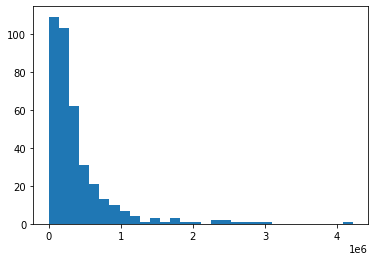

In [35]:
plt.hist( M_E_Station_MAX['ENTRIES & EXITS'],bins = 30 )  

In [36]:
M_E_Station_MAX['ENTRIES & EXITS'].describe()

count    3.790000e+02
mean     4.036149e+05
std      5.036128e+05
min      4.440000e+02
25%      1.305190e+05
50%      2.368470e+05
75%      4.716815e+05
max      4.218375e+06
Name: ENTRIES & EXITS, dtype: float64

We choose 20 stations with most mornning and evning traffic for further analysis and installed in a list called ```busy_list```.

In [37]:
M_E_Station_MAX.sort_values(by = 'ENTRIES & EXITS',ascending = False,inplace = True)
busy_list = M_E_Station_MAX.index[:20].values.tolist()
print(busy_list)

['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', '42 ST-PORT AUTH', '86 ST', '14 ST-UNION SQ', 'FULTON ST', '125 ST', '23 ST', 'TIMES SQ-42 ST', 'FLUSHING-MAIN', '96 ST', '59 ST', 'PATH NEW WTC', 'CANAL ST', 'JKSN HT-ROOSVLT', '59 ST COLUMBUS', '14 ST', '72 ST', 'ATL AV-BARCLAY']


In [38]:
M_E_Station_MAX[M_E_Station_MAX.index =='34 ST-PENN STA']

,TIMESLOT_ENTRIES,TIMESLOT_EXITS,ENTRIES & EXITS
STATION,,,
34 ST-PENN STA,1815801.0,2402574.0,4218375.0


## 3.  Look for stations with commute patterns

Now from those 20 stations, we want to find out those stations with more exist than entries in the morning but more entries than exits in the evening. The pattern help us recognize commute stations.

In [50]:
M_E_Station.STATION.unique().size

379

To sum all the turnstiles at the same stations together to get traffic info for each station at each TIME_SLOT

In [51]:
temp = (M_E_Station.groupby(['STATION','DATE','TIME_SLOT'],as_index = False)
        ['TIMESLOT_ENTRIES','TIMESLOT_EXITS','ENTRIES & EXITS']
        .sum()
       )

temp['difference'] = temp['TIMESLOT_ENTRIES']-temp['TIMESLOT_EXITS']

/var/folders/py/tfswslv1637f5tfr0ngkmsgr0000gn/T/ipykernel_1251/3196553590.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = (M_E_Station.groupby(['STATION','DATE','TIME_SLOT'],as_index = False)


In [52]:
# Randomly pick one station from list Select_Station_list_1 to have a look
temp['Day_Of_Week'] = temp.DATE.dt.day_name()
temp[temp.STATION == '59 ST'].head()

,STATION,DATE,TIME_SLOT,TIMESLOT_ENTRIES,TIMESLOT_EXITS,ENTRIES & EXITS,difference,Day_Of_Week
15441,59 ST,2021-05-29,Evening,3977.0,3787.0,7764.0,190.0,Saturday
15442,59 ST,2021-05-29,Morning,891.0,1417.0,2308.0,-526.0,Saturday
15443,59 ST,2021-05-30,Evening,2772.0,2578.0,5350.0,194.0,Sunday
15444,59 ST,2021-05-30,Morning,609.0,959.0,1568.0,-350.0,Sunday
15445,59 ST,2021-05-31,Evening,4021.0,3959.0,7980.0,62.0,Monday


In [53]:
temp = temp.groupby(['STATION','TIME_SLOT'],as_index = False)['ENTRIES & EXITS','difference'].mean()
temp.index.name = 'Count'
temp.head()

/var/folders/py/tfswslv1637f5tfr0ngkmsgr0000gn/T/ipykernel_1251/1170773171.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = temp.groupby(['STATION','TIME_SLOT'],as_index = False)['ENTRIES & EXITS','difference'].mean()


,STATION,TIME_SLOT,ENTRIES & EXITS,difference
Count,,,,
0,1 AV,Evening,6155.406593,-1308.065934
1,1 AV,Morning,1852.197802,-1033.252747
2,103 ST,Evening,5972.043956,461.824176
3,103 ST,Morning,3855.989011,-279.549451
4,103 ST-CORONA,Evening,5626.153846,-2777.560440


In [54]:
temp[temp.STATION == '59 ST']

,STATION,TIME_SLOT,ENTRIES & EXITS,difference
Count,,,,
170,59 ST,Evening,13787.945055,2308.010989
171,59 ST,Morning,5659.626374,-2252.000000


In [55]:
temp =temp.pivot(index = 'STATION',columns= 'TIME_SLOT',values = 'difference')
temp[temp.index == '59 ST']

TIME_SLOT,Evening,Morning
STATION,,
59 ST,2308.010989,-2252.0


In [56]:
temp.columns =  ['Evening','Morning']
temp.columns

Index(['Evening', 'Morning'], dtype='object')

In [57]:
def set_fit(row):
    if row['Evening'] > 0 and row['Morning'] < 0:
        return True
    else:
        return False
temp['FIT'] = temp.apply(set_fit,axis = 1)


In [58]:
Commute_Station_list = temp[temp['FIT']== True].index
Commute_Station_list

Index(['103 ST', '116 ST-COLUMBIA', '138/GRAND CONC', '14TH STREET', '168 ST',
       '18 ST', '23 ST', '33 ST', '33 ST-RAWSON ST', '34 ST-HERALD SQ',
       '34 ST-HUDSON YD', '36 ST', '42 ST-BRYANT PK', '47-50 STS ROCK',
       '49 ST', '5 AV/53 ST', '5 AV/59 ST', '5 AVE', '50 ST', '51 ST', '57 ST',
       '57 ST-7 AV', '59 ST', '59 ST COLUMBUS', '6 AV', '68ST-HUNTER CO',
       '72 ST-2 AVE', '77 ST', '8 AV', '81 ST-MUSEUM', '86 ST-2 AVE', '96 ST',
       '96 ST-2 AVE', '9TH STREET', 'BLEECKER ST', 'BOROUGH HALL',
       'BOWLING GREEN', 'BROAD ST', 'BROOKLYN BRIDGE', 'CANAL ST',
       'CARROLL ST', 'CHAMBERS ST', 'CITY HALL', 'CLINTON-WASH AV',
       'CORTLANDT ST', 'COURT SQ-23 ST', 'CYPRESS AV', 'E 143/ST MARY'S',
       'EAST BROADWAY', 'FLUSHING AV', 'FRANKLIN ST', 'FULTON ST', 'GRAND ST',
       'HEWES ST', 'HOUSTON ST', 'HOYT ST', 'HUNTERS PT AV', 'JAY ST-METROTEC',
       'LEXINGTON AV/53', 'LEXINGTON AV/63', 'LONGWOOD AV', 'PARK PLACE',
       'PATH NEW WTC', 'QUEENS PLAZ

Save Stations with big entry and exits difference values in  list ```big_diff_list```.

In [86]:
l1 =  temp[temp['FIT']== True].sort_values('Evening',ascending = False).head(20).index.tolist()    
l2 =  temp[temp['FIT']== True].sort_values('Morning').head(20).index.tolist()

In [87]:
big_diff_list = set(l1)&set(l2)
print(big_diff_list)  # Stations lin big_diff_list has both big difference in the morning and evening

{'5 AV/53 ST', '47-50 STS ROCK', '42 ST-BRYANT PK', '5 AV/59 ST', '23 ST', 'LEXINGTON AV/53', '59 ST COLUMBUS', 'CHAMBERS ST', 'WALL ST', '77 ST', '96 ST', '59 ST', '72 ST-2 AVE', 'PATH NEW WTC'}


### Draw grid plot 

Define a fucntion ```print_stations_daily_trend``` which, given a station list,will print the list and grid plot of daily traffic trend of stations in the list.

In [153]:
def print_stations_daily_trend(station_list):
    Select_Station_Data = turnstile_df[turnstile_df['STATION'].isin(station_list)]
    
    Select_Station_ = (Select_Station_Data.groupby(['STATION','DATE','TIME_SLOT']
                       ,as_index = False)['TIMESLOT_ENTRIES','TIMESLOT_EXITS'].sum())
    
    Select_Station_ = Select_Station_.melt(id_vars = ['STATION','DATE','TIME_SLOT'],
                             value_vars = ['TIMESLOT_ENTRIES','TIMESLOT_EXITS'],
                             var_name = 'TYPE',value_name = 'Number')
    
    grid = sns.FacetGrid(Select_Station_,col="STATION", col_wrap=4, hue = 'TYPE' )
    grid.map(sns.lineplot,'TIME_SLOT','Number')
    grid.set_xticklabels(rotation = 45)
    grid.add_legend()
    grid.fig.subplots_adjust(top= 0.8)
    grid.fig.suptitle('Daily traffic trend of entries and exits')
    print('Stations are:\n',station_list)

In [101]:
busy_commute_list = list(set(busy_list) & set(Commute_Station_list ))
print(busy_commute_list)

['34 ST-HERALD SQ', '23 ST', '59 ST COLUMBUS', 'CANAL ST', '96 ST', '59 ST', 'PATH NEW WTC', 'FULTON ST']


### Grid plot of daily traffci trend of busy stations with a commute pattern 

/var/folders/py/tfswslv1637f5tfr0ngkmsgr0000gn/T/ipykernel_1251/1508088407.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Select_Station_ = (Select_Station_Data.groupby(['STATION','DATE','TIME_SLOT']


Stations are:
 ['34 ST-HERALD SQ', '23 ST', '59 ST COLUMBUS', 'CANAL ST', '96 ST', '59 ST', 'PATH NEW WTC', 'FULTON ST']


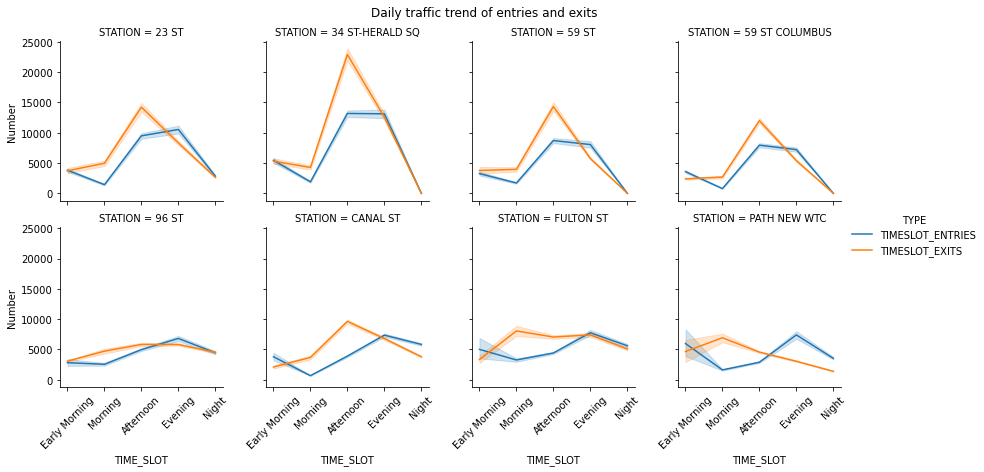

In [102]:
print_stations_daily_trend(busy_commute_list)

### Draw grid plot of daily traffic trend of stations with big exits/entries diffence in the moring and eveing

/var/folders/py/tfswslv1637f5tfr0ngkmsgr0000gn/T/ipykernel_1251/1508088407.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Select_Station_ = (Select_Station_Data.groupby(['STATION','DATE','TIME_SLOT']


Stations are:
 {'5 AV/53 ST', '47-50 STS ROCK', '42 ST-BRYANT PK', '5 AV/59 ST', '23 ST', 'LEXINGTON AV/53', '59 ST COLUMBUS', 'CHAMBERS ST', 'WALL ST', '77 ST', '96 ST', '59 ST', '72 ST-2 AVE', 'PATH NEW WTC'}


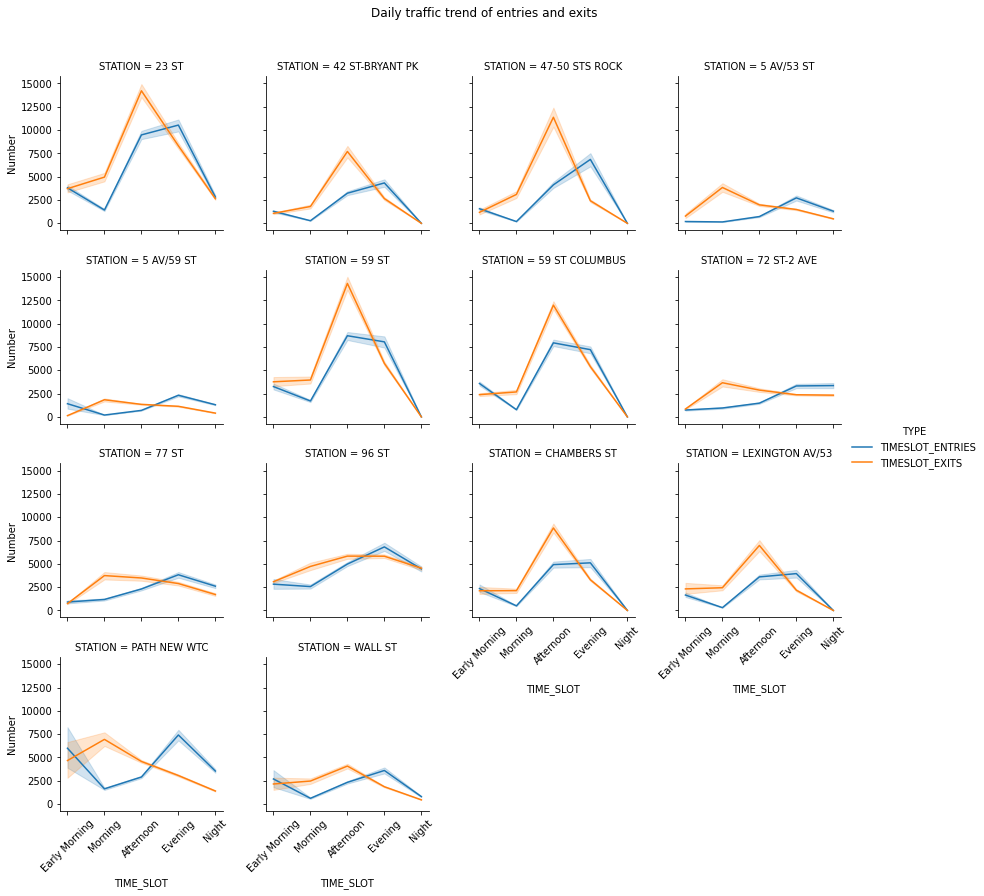

In [104]:
print_stations_daily_trend(big_diff_list )

### 4. further Analysis on stations with commute pattern

In [105]:
Less_busy_commute_list  = list(set(Commute_Station_list )-set(busy_list))
print(Less_busy_commute_list)

['LEXINGTON AV/63', '50 ST', 'COURT SQ-23 ST', 'CLINTON-WASH AV', 'GRAND ST', '14TH STREET', 'HEWES ST', '103 ST', '168 ST', 'BROAD ST', 'RECTOR ST', '6 AV', 'CORTLANDT ST', 'THIRTY THIRD ST', 'PARK PLACE', 'EAST BROADWAY', 'CYPRESS AV', 'BROOKLYN BRIDGE', 'FRANKLIN ST', '47-50 STS ROCK', '5 AV/59 ST', 'BOROUGH HALL', 'LEXINGTON AV/53', 'WORLD TRADE CTR', 'TWENTY THIRD ST', '34 ST-HUDSON YD', 'HUNTERS PT AV', '77 ST', '116 ST-COLUMBIA', '72 ST-2 AVE', 'LONGWOOD AV', '36 ST', '49 ST', 'CITY HALL', '68ST-HUNTER CO', '42 ST-BRYANT PK', '81 ST-MUSEUM', 'BLEECKER ST', 'CHAMBERS ST', 'HOUSTON ST', '51 ST', 'QUEENS PLAZA', '18 ST', '9TH STREET', 'THIRTY ST', "E 143/ST MARY'S", '86 ST-2 AVE', 'BOWLING GREEN', '138/GRAND CONC', 'FLUSHING AV', '33 ST-RAWSON ST', '5 AV/53 ST', '96 ST-2 AVE', 'YORK ST', '8 AV', '57 ST-7 AV', 'CARROLL ST', '57 ST', 'HOYT ST', 'JAY ST-METROTEC', 'SPRING ST', 'WALL ST', '5 AVE', '33 ST']


### To calculate the ratio  of the entry and exit number in both moring and evening to the daily total traffic of the according station 

### To calcluate the daily total traffic of the selected station 

In [106]:
Select_Station_Data = turnstile_df[turnstile_df['STATION'].isin(Commute_Station_list)]

In [107]:
Select_Station_Daily =Select_Station_Data.groupby(['STATION','DATE'],as_index = False)['TIMESLOT_ENTRIES','TIMESLOT_EXITS'].sum()
Select_Station_Daily.rename(columns = ({'TIMESLOT_ENTRIES':'Daily_Total_Entries','TIMESLOT_EXITS':'Daily_Total_EXITS'}),inplace = True)
Select_Station_Daily


/var/folders/py/tfswslv1637f5tfr0ngkmsgr0000gn/T/ipykernel_1251/215491328.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Select_Station_Daily =Select_Station_Data.groupby(['STATION','DATE'],as_index = False)['TIMESLOT_ENTRIES','TIMESLOT_EXITS'].sum()


,STATION,DATE,Daily_Total_Entries,Daily_Total_EXITS
0,103 ST,2021-05-29,6141.0,5929.0
1,103 ST,2021-05-30,5287.0,5947.0
2,103 ST,2021-05-31,6717.0,6801.0
3,103 ST,2021-06-01,11866.0,12502.0
4,103 ST,2021-06-02,12403.0,13004.0
...,...,...,...,...
6541,YORK ST,2021-08-23,2992.0,3669.0
6542,YORK ST,2021-08-24,4068.0,4756.0
6543,YORK ST,2021-08-25,4030.0,4873.0
6544,YORK ST,2021-08-26,3910.0,4876.0


Now calculate the entry and exit number only in the `TIME_SLOT` of Morning and Evening.

In [108]:
Select_Station_M_E = Select_Station_Data.groupby(['STATION','DATE','TIME_SLOT'],as_index = False)['TIMESLOT_ENTRIES','TIMESLOT_EXITS'].sum()
Select_Station_M_E

/var/folders/py/tfswslv1637f5tfr0ngkmsgr0000gn/T/ipykernel_1251/3487925758.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Select_Station_M_E = Select_Station_Data.groupby(['STATION','DATE','TIME_SLOT'],as_index = False)['TIMESLOT_ENTRIES','TIMESLOT_EXITS'].sum()


,STATION,DATE,TIME_SLOT,TIMESLOT_ENTRIES,TIMESLOT_EXITS
0,103 ST,2021-05-29,Early Morning,38.0,252.0
1,103 ST,2021-05-29,Morning,760.0,777.0
2,103 ST,2021-05-29,Afternoon,1622.0,1392.0
3,103 ST,2021-05-29,Evening,2214.0,1805.0
4,103 ST,2021-05-29,Night,1507.0,1703.0
...,...,...,...,...,...
32755,YORK ST,2021-08-27,Early Morning,613.0,266.0
32756,YORK ST,2021-08-27,Morning,276.0,983.0
32757,YORK ST,2021-08-27,Afternoon,471.0,1253.0
32758,YORK ST,2021-08-27,Evening,1282.0,980.0


In [109]:
M_EXITS = (
    Select_Station_M_E[Select_Station_M_E['TIME_SLOT']=='Morning']
    [['STATION','DATE','TIMESLOT_EXITS']])
M_EXITS.rename(columns = {'TIMESLOT_EXITS':'M_EXITS'},inplace = True)
M_EXITS

,STATION,DATE,M_EXITS
1,103 ST,2021-05-29,777.0
6,103 ST,2021-05-30,580.0
11,103 ST,2021-05-31,825.0
16,103 ST,2021-06-01,2778.0
21,103 ST,2021-06-02,2729.0
...,...,...,...
32736,YORK ST,2021-08-23,1070.0
32741,YORK ST,2021-08-24,1169.0
32746,YORK ST,2021-08-25,1193.0
32751,YORK ST,2021-08-26,1149.0


In [110]:
E_ENTRIES = (
    Select_Station_M_E[Select_Station_M_E['TIME_SLOT']=='Evening']
    [['STATION','DATE','TIMESLOT_ENTRIES']])
E_ENTRIES.rename(columns = {'TIMESLOT_ENTRIES':'E_ENTRIES'},inplace = True)
E_ENTRIES

,STATION,DATE,E_ENTRIES
3,103 ST,2021-05-29,2214.0
8,103 ST,2021-05-30,1682.0
13,103 ST,2021-05-31,2311.0
18,103 ST,2021-06-01,3851.0
23,103 ST,2021-06-02,4015.0
...,...,...,...
32738,YORK ST,2021-08-23,1001.0
32743,YORK ST,2021-08-24,1292.0
32748,YORK ST,2021-08-25,1237.0
32753,YORK ST,2021-08-26,1196.0


In [111]:
Select_Station_Daily= (
    Select_Station_Daily.merge(M_EXITS,on = ['STATION','DATE']).merge(E_ENTRIES,on = ['STATION','DATE']))

In [112]:
Select_Station_Daily

,STATION,DATE,Daily_Total_Entries,Daily_Total_EXITS,M_EXITS,E_ENTRIES
0,103 ST,2021-05-29,6141.0,5929.0,777.0,2214.0
1,103 ST,2021-05-30,5287.0,5947.0,580.0,1682.0
2,103 ST,2021-05-31,6717.0,6801.0,825.0,2311.0
3,103 ST,2021-06-01,11866.0,12502.0,2778.0,3851.0
4,103 ST,2021-06-02,12403.0,13004.0,2729.0,4015.0
...,...,...,...,...,...,...
6541,YORK ST,2021-08-23,2992.0,3669.0,1070.0,1001.0
6542,YORK ST,2021-08-24,4068.0,4756.0,1169.0,1292.0
6543,YORK ST,2021-08-25,4030.0,4873.0,1193.0,1237.0
6544,YORK ST,2021-08-26,3910.0,4876.0,1149.0,1196.0


In [113]:
Select_Station_Daily['M_EXITS_Perc'] = (
    Select_Station_Daily['M_EXITS']/Select_Station_Daily['Daily_Total_EXITS'])
Select_Station_Daily['E_Entry_Perc'] = (
    Select_Station_Daily['E_ENTRIES']/Select_Station_Daily['Daily_Total_Entries'])

In [114]:
Select_Station_Daily

,STATION,DATE,Daily_Total_Entries,Daily_Total_EXITS,M_EXITS,E_ENTRIES,M_EXITS_Perc,E_Entry_Perc
0,103 ST,2021-05-29,6141.0,5929.0,777.0,2214.0,0.131051,0.360528
1,103 ST,2021-05-30,5287.0,5947.0,580.0,1682.0,0.097528,0.318139
2,103 ST,2021-05-31,6717.0,6801.0,825.0,2311.0,0.121306,0.344052
3,103 ST,2021-06-01,11866.0,12502.0,2778.0,3851.0,0.222204,0.324541
4,103 ST,2021-06-02,12403.0,13004.0,2729.0,4015.0,0.209859,0.323712
...,...,...,...,...,...,...,...,...
6541,YORK ST,2021-08-23,2992.0,3669.0,1070.0,1001.0,0.291633,0.334559
6542,YORK ST,2021-08-24,4068.0,4756.0,1169.0,1292.0,0.245795,0.317601
6543,YORK ST,2021-08-25,4030.0,4873.0,1193.0,1237.0,0.244818,0.306948
6544,YORK ST,2021-08-26,3910.0,4876.0,1149.0,1196.0,0.235644,0.305882


In [139]:
s1 = Select_Station_Daily.groupby('STATION')['M_EXITS_Perc','E_Entry_Perc'].mean()
station1 = s1.sort_values(by='M_EXITS_Perc',ascending = False).index.values.tolist()
station2 = s1.sort_values(by='E_Entry_Perc',ascending = False).index.values.tolist()

/var/folders/py/tfswslv1637f5tfr0ngkmsgr0000gn/T/ipykernel_1251/3236866293.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  s1 = Select_Station_Daily.groupby('STATION')['M_EXITS_Perc','E_Entry_Perc'].mean()


In [140]:
s1.sort_values(by='M_EXITS_Perc',ascending = False)

,M_EXITS_Perc,E_Entry_Perc
STATION,,
5 AV/53 ST,0.388727,0.516832
THIRTY THIRD ST,0.368367,0.385148
PATH NEW WTC,0.359359,0.381040
5 AV/59 ST,0.357039,0.435147
HUNTERS PT AV,0.345751,0.321878
...,...,...
34 ST-HERALD SQ,0.090421,0.385002
18 ST,0.085713,0.378828
BLEECKER ST,0.082028,0.337316


In [141]:
s1.sort_values(by='E_Entry_Perc',ascending = False)

,M_EXITS_Perc,E_Entry_Perc
STATION,,
5 AV/53 ST,0.388727,0.516832
47-50 STS ROCK,0.151257,0.508448
5 AVE,0.126585,0.485219
42 ST-BRYANT PK,0.123597,0.453773
CITY HALL,0.123032,0.436794
...,...,...
LONGWOOD AV,0.239732,0.293066
96 ST-2 AVE,0.178774,0.292807
36 ST,0.207978,0.285110


In [142]:
high_perc_stations= pd.DataFrame([station1,station2]).transpose().head(20)
high_perc_stations.columns= ['M_EXITS_Perc_Rank','E_Entry_Perc_Rank']
high_perc_stations

,M_EXITS_Perc_Rank,E_Entry_Perc_Rank
0,5 AV/53 ST,5 AV/53 ST
1,THIRTY THIRD ST,47-50 STS ROCK
2,PATH NEW WTC,5 AVE
3,5 AV/59 ST,42 ST-BRYANT PK
4,HUNTERS PT AV,CITY HALL
5,E 143/ST MARY'S,5 AV/59 ST
6,TWENTY THIRD ST,81 ST-MUSEUM
7,68ST-HUNTER CO,TWENTY THIRD ST
8,72 ST-2 AVE,SPRING ST
9,77 ST,68ST-HUNTER CO


/var/folders/py/tfswslv1637f5tfr0ngkmsgr0000gn/T/ipykernel_1251/1508088407.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Select_Station_ = (Select_Station_Data.groupby(['STATION','DATE','TIME_SLOT']


Stations are:
 0          5 AV/53 ST
1     THIRTY THIRD ST
2        PATH NEW WTC
3          5 AV/59 ST
4       HUNTERS PT AV
5     E 143/ST MARY'S
6     TWENTY THIRD ST
7      68ST-HUNTER CO
8         72 ST-2 AVE
9               77 ST
10    33 ST-RAWSON ST
11     138/GRAND CONC
12         CYPRESS AV
13          THIRTY ST
14              57 ST
15        14TH STREET
16          FULTON ST
17        LONGWOOD AV
18           BROAD ST
19        FLUSHING AV
Name: M_EXITS_Perc_Rank, dtype: object


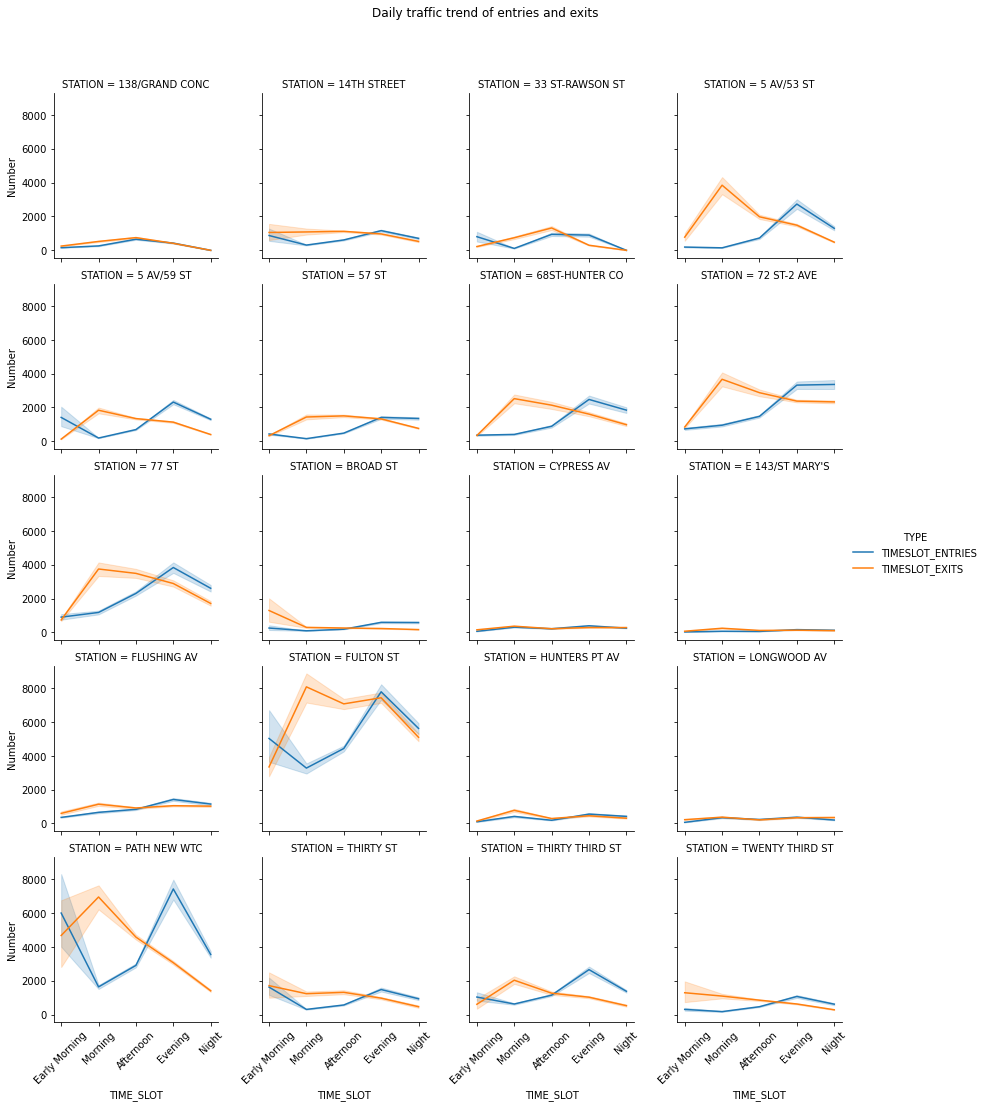

In [143]:
print_stations_daily_trend(high_perc_stations.M_EXITS_Perc_Rank)

/var/folders/py/tfswslv1637f5tfr0ngkmsgr0000gn/T/ipykernel_1251/1508088407.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Select_Station_ = (Select_Station_Data.groupby(['STATION','DATE','TIME_SLOT']


Stations are:
 0          5 AV/53 ST
1      47-50 STS ROCK
2               5 AVE
3     42 ST-BRYANT PK
4           CITY HALL
5          5 AV/59 ST
6        81 ST-MUSEUM
7     TWENTY THIRD ST
8           SPRING ST
9      68ST-HUNTER CO
10              51 ST
11    LEXINGTON AV/53
12    BROOKLYN BRIDGE
13    THIRTY THIRD ST
14    34 ST-HERALD SQ
15            WALL ST
16        CHAMBERS ST
17       PATH NEW WTC
18    116 ST-COLUMBIA
19              18 ST
Name: E_Entry_Perc_Rank, dtype: object


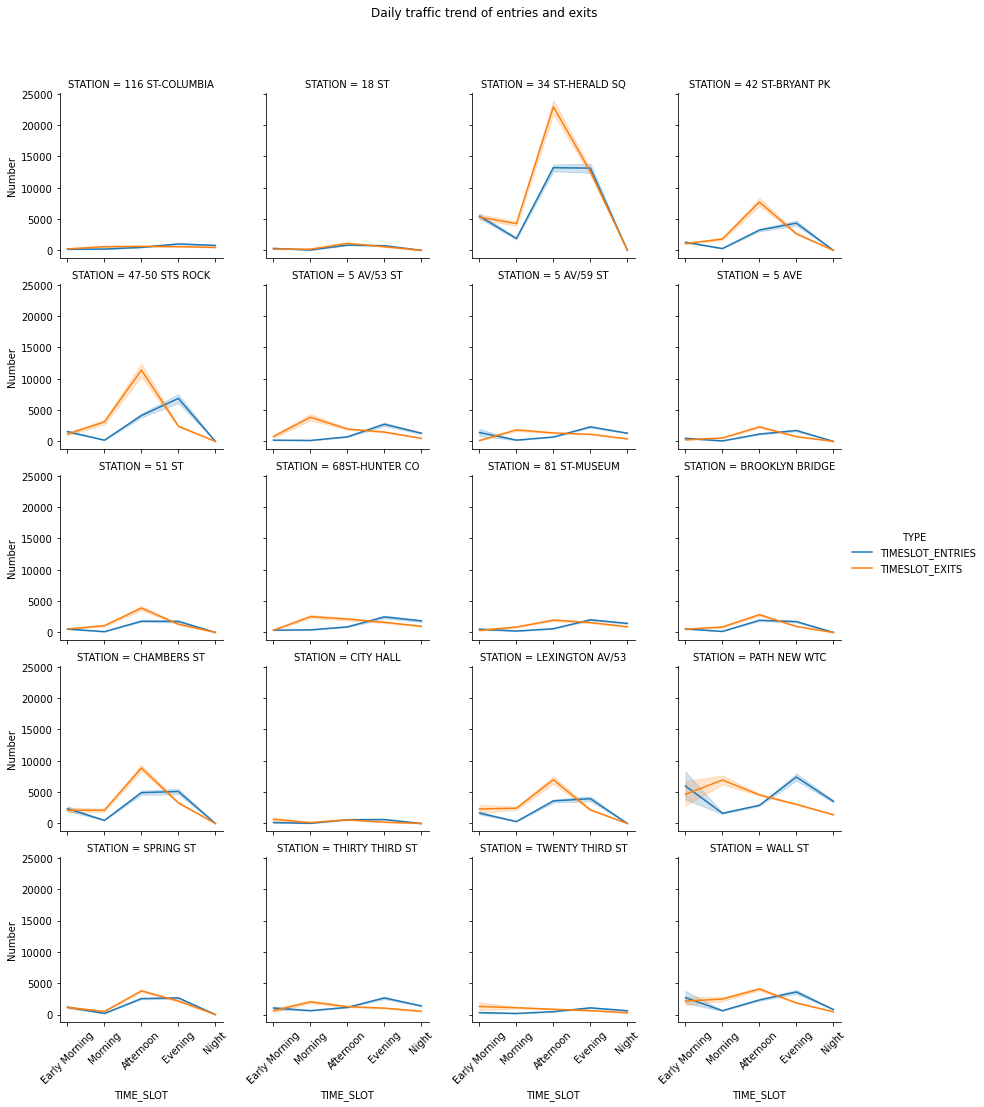

In [144]:
print_stations_daily_trend(high_perc_stations.E_Entry_Perc_Rank)

### Print grid plot of daily traffic trend of stations with high morning exits and high evening entries ratio

In [145]:
both_ratio_stations = set(high_perc_stations.M_EXITS_Perc_Rank) & set( high_perc_stations.E_Entry_Perc_Rank)

/var/folders/py/tfswslv1637f5tfr0ngkmsgr0000gn/T/ipykernel_1251/349968355.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Select_Station_ = (Select_Station_Data.groupby(['STATION','DATE','TIME_SLOT']


Stations are:
 {'5 AV/53 ST', 'PATH NEW WTC', '68ST-HUNTER CO', '5 AV/59 ST', 'TWENTY THIRD ST', 'THIRTY THIRD ST'}


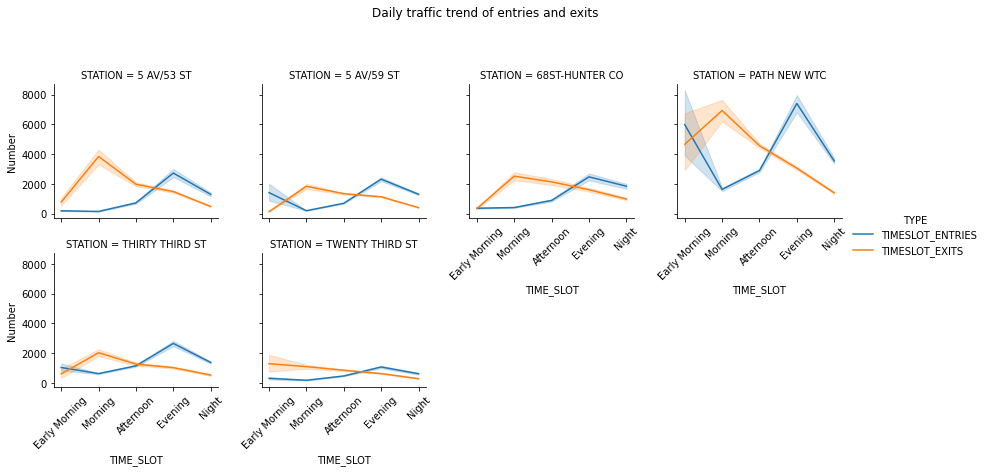

In [155]:
print_stations_daily_trend(both_ratio_stations)

 ### Drow grid plot of daily traffic trend of stations satisfying both high morning exits/evening entries ratio and high entry/exits difference value
    

/var/folders/py/tfswslv1637f5tfr0ngkmsgr0000gn/T/ipykernel_1251/349968355.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Select_Station_ = (Select_Station_Data.groupby(['STATION','DATE','TIME_SLOT']


Stations are:
 {'5 AV/53 ST', 'PATH NEW WTC', '5 AV/59 ST'}


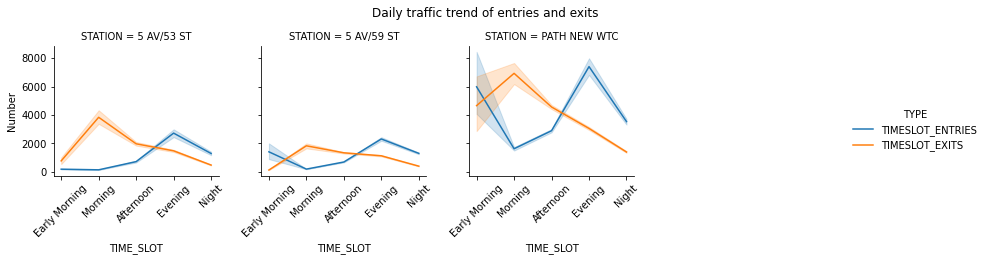

In [154]:
final_list  = set(big_diff_list) & set(both_ratio_stations)
print_stations_daily_trend(final_list)

In [166]:
temp[temp.index.isin(final_list)]

,Evening,Morning,FIT
STATION,,,
5 AV/53 ST,1245.538462,-3694.538462,True
5 AV/59 ST,1183.439560,-1639.230769,True
PATH NEW WTC,4348.846154,-5304.758242,True


In [168]:
s1[s1.index.isin(final_list)]

,M_EXITS_Perc,E_Entry_Perc
STATION,,
5 AV/53 ST,0.388727,0.516832
5 AV/59 ST,0.357039,0.435147
PATH NEW WTC,0.359359,0.381040
